## Лабораторная 4: восстановление плотности распределения

Данными в этом задании являются измерения некоторых проверочных параметров на конвейерах  сборки оборудования Bosh (см. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» на Kaggle). 

Все исходные данные Bosh не помещаются в оперативную память компьютера, поэтому в файле `data.csv` — лишь некоторые признаки. Прочтите данные из файла `data.csv`. Целевым признаком здесь является `Response` — наличие брака в оборудовании. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv",delimiter = ',')# место для кода
data.describe()

,L1_S24_F1844,L1_S24_F1846,Response
count,54729.000000,54729.000000,54729.000000
mean,0.000834,-0.000758,0.010123
std,0.190919,0.134541,0.100102
min,-0.406000,-0.622000,0.000000
25%,-0.146000,-0.120000,0.000000
50%,0.000000,-0.001000,0.000000
75%,0.143000,0.125000,0.000000
max,0.556000,0.355000,1.000000


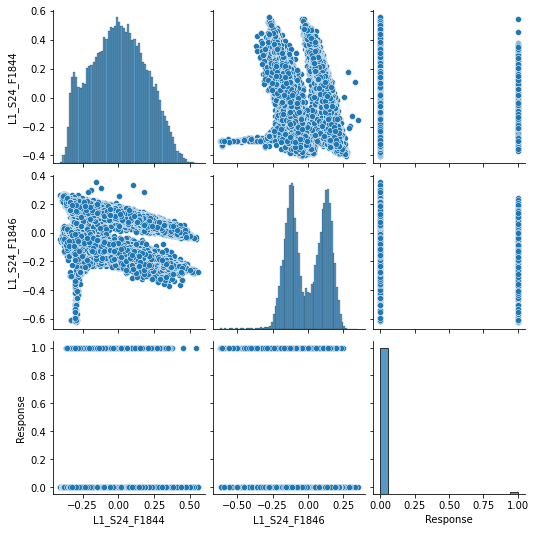

In [3]:
import seaborn as sns
sns.pairplot(data)

## 1 
Постройте на одном графике два приближения к плотности распределения признака `L1_S24_F1846` для `Response = 0` и для `Response = 1`, используя одно из следующих ядер (номер ядра выберите по формуле: `(n mod 6) + 1`, где `n` — ваш номер в списке группы):

    1.	кусочно-постоянное (прямоугольное) -  tophat
    2.	гауссовское -  gaussian
    3.	линейное (треугольник) -  linear
    4.	косинусоидальное -  cosine
    5.	квадратичное (Епанечникова) -  epanechnikov
    6.	экспоненциальное -  exponential


c:\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


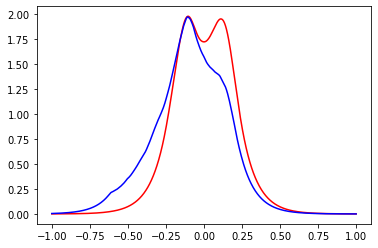

In [4]:
#6
from sklearn.neighbors.kde import KernelDensity
import numpy as np

import matplotlib.pyplot as plt

i0 = data['Response'] == 0
kde0 = KernelDensity(kernel='exponential', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
i1 = data['Response'] == 1
kde1 = KernelDensity(kernel='exponential', bandwidth=0.1).fit(data.loc[i1, 'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности
Dens1 = np.exp(kde1.score_samples(X_plot))  # score_samples возвращает логарифм плотности
plt.plot(X_plot,Dens0,color = 'red')
plt.plot(X_plot,Dens1, color = 'blue')

*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности

In [5]:
# место для кода

Ответьте в комментариях на вопрос: является ли выборка хорошо разделимой по признаку  `L1_S24_F1846`?

## Я бы так не сказал. У них распределения похожи. Кроме того, можно посмотреть на график Seaborne . Pairplot. Там прям хорошо видно.

## 2

Разбейте выборку `data` на две равные части: тренировочную `dataTrain` и проверочную `dataTest`. 

In [6]:
dataTrain = data.loc[0:data.shape[0] / 2, ].reset_index(drop=True)
dataTest = data.loc[data.shape[0] / 2:data.shape[0], ].reset_index(drop=True)

Пользуясь кросс-валидацией, подберите **для каждого класса `Response` (`r=0` и `r=1`)** значение ширины ядра `bandwidth`, при котором логарифм правдоподобия максимален на проверочной выборке.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [8]:
data_train_resp0 = dataTrain.loc[dataTrain['Response']==0,'L1_S24_F1846']
data_train_resp1 = dataTrain.loc[dataTrain['Response']==1,'L1_S24_F1846']
data_test_resp0 = dataTest.loc[dataTest['Response']==0,'L1_S24_F1846']
data_test_resp1 = dataTest.loc[dataTest['Response']==1,'L1_S24_F1846']

In [18]:
# место для кода
#Recalculate!
from tqdm import tqdm
results = [[],[]]
for bandwith in tqdm(np.arange(0.01,0.1,0.02)):
    kde0 = KernelDensity(kernel='gaussian', bandwidth=bandwith)
    kde0.fit(data_train_resp0.values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(data_test_resp0.values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    results[0].append(logLikehood0)
    kde1 = KernelDensity(kernel='gaussian', bandwidth=bandwith)
    kde1.fit(data_train_resp1.values.reshape(-1, 1))
    logProbability1 = kde1.score_samples(data_test_resp1.values.reshape(-1, 1))
    logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
    logLikehood1 = logProbability1.sum()
    results[1].append(logLikehood1)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:06<00:00, 49.34s/it]


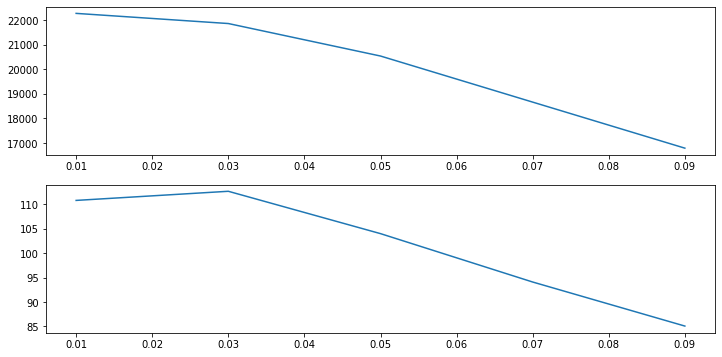

In [27]:
_,(ax1,ax2) = plt.subplots(2,1,figsize=(12,6))
ax1.plot(np.arange(0.01,0.1,0.02),results[0])
ax2.plot(np.arange(0.01,0.1,0.02),results[1])

### 3

Для найденных наилучших `bandwidth` вычислите `p(x|0)` и `p(x|1)` для тестовой выборки. 

In [28]:
bandwith0 = 0.01
bandwith1 = 0.03

In [29]:
data_train_resp0_f = data_train_resp0.values.reshape(-1,1)
data_train_resp1_f = data_train_resp1.values.reshape(-1,1)
kde0 = KernelDensity(kernel='gaussian', bandwidth=bandwith)
kde0.fit(data_train_resp0_f)
kde1 = KernelDensity(kernel='gaussian', bandwidth=bandwith)
kde1.fit(data_train_resp1_f)
predictionProbXafter0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

In [32]:
p_x_0 = predictionProbXafter0
p_x_1 = predictionProbXafter1
p_0 = len(data[data['Response']==0]) / len(data); 
p_1 = len(data[data['Response']==1]) / len(data)
p_x =  p_x_0*p_0 + p_x_1*p_1
p_0_x = (p_x_0 * p_0)/(p_x)
p_1_x = (p_x_1 * p_1)/(p_x)


По формуле Байеса найдите затем `p(0|x)` и `p(1|x)`. Отсортируйте все объекты тестовой выборки по возрастанию предсказанной вероятности `p(1|x)`, выведите на экран вероятности для последних 10 объектов и рассчитайте количество бракованных деталей среди последних 100 объектов в отсортированном ряду.

*Help:*
    
    ind = np.argsort(predictionProb1afterX) - сортировка, возвращающая индексы элементов
    print(predictionProb1afterX[ind[-10:]]) - вывод последних 10 элементов
    print(sum(dataTest.loc[ind[-100:],'Response'])) - количество бракованных среди 100 с максимальной вероятностью брака

In [40]:
# место для кода
print(p_0_x)
print(p_1_x)


[0.99281266 0.99422002 0.99411056 ... 0.99404589 0.98960592 0.98999125]
[0.00718734 0.00577998 0.00588944 ... 0.00595411 0.01039408 0.01000875]


In [41]:
ind0 = np.argsort(p_0_x)# - сортировка, возвращающая индексы элементов
print(p_0_x[ind0[-10:]])# - вывод последних 10 элементов
print(sum(dataTest.loc[ind0[-100:],'Response']))
ind1 = np.argsort(p_1_x)# - сортировка, возвращающая индексы элементов
print(p_1_x[ind1[-10:]])# - вывод последних 10 элементов
print(sum(dataTest.loc[ind1[-100:],'Response']))

[0.99452294 0.99452294 0.99452764 0.99452764 0.99453    0.99458373
 0.99461755 0.99465321 0.99471482 0.99477466]
0
[0.52789242 0.52862467 0.52862467 0.53328655 0.53328655 0.53390886
 0.53421762 0.53421762 0.53574409 0.53574409]
29
